In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Cybersure_IT_HelpDesk_Tickets.csv")

In [3]:
df.head(3)

RequestorSeniority  ITOwner  FiledAgainst  TicketType  Severity  Priority  \
0                   1       50             3           0         2         0   
1                   2       15             2           1         1         1   
2                   2       15             0           1         2         0   

   daysOpen  Satisfaction  
0         3             1  
1         5             1  
2         0             0

In [5]:
df['daysOpen'].value_counts()

0     24001
5      7916
1      7688
6      6865
7      5562
2      5111
3      4995
8      3874
4      3725
10     3087
13     2872
9      2659
14     2494
11     2490
15     2168
12     1984
16     1750
17     1562
18     1316
19     1105
20      892
21      763
22      622
26      578
23      485
27      455
28      441
24      352
29      343
30      320
25      272
31      265
32      225
33      181
34      154
35      119
37       79
36       78
38       53
39       22
40       22
42       16
41       16
43        9
44        7
45        4
54        1
48        1
49        1
Name: daysOpen, dtype: int64

In [6]:
df.describe()

RequestorSeniority        ITOwner   FiledAgainst     TicketType  \
count       100000.000000  100000.000000  100000.000000  100000.000000   
mean             2.384730      25.461000       1.702170       0.750740   
std              1.017174      14.447961       1.268173       0.432587   
min              1.000000       1.000000       0.000000       0.000000   
25%              2.000000      13.000000       0.000000       1.000000   
50%              2.000000      26.000000       2.000000       1.000000   
75%              3.000000      38.000000       3.000000       1.000000   
max              4.000000      50.000000       3.000000       1.000000   

            Severity       Priority       daysOpen   Satisfaction  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        2.047830       1.591270       6.842830       1.475170  
std         0.377497       1.254666       7.377876       1.197864  
min         0.000000       0.000000       0.000000       0.000000  
25%         2.000000       0.000000       1.000000       0.000000  
50%         2.000000       2.000000       5.000000       1.000000  
75%         2.000000       3.000000      10.000000       3.000000  
max         4.000000       3.000000      54.000000       3.000000

array([[<Axes: title={'center': 'daysOpen'}>]], dtype=object)

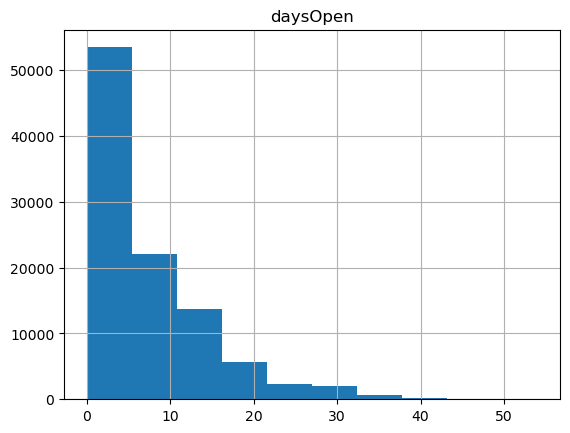

In [8]:
df.hist('daysOpen')

array([[<Axes: title={'center': 'RequestorSeniority'}>,
        <Axes: title={'center': 'ITOwner'}>,
        <Axes: title={'center': 'FiledAgainst'}>],
       [<Axes: title={'center': 'TicketType'}>,
        <Axes: title={'center': 'Severity'}>,
        <Axes: title={'center': 'Priority'}>],
       [<Axes: title={'center': 'daysOpen'}>,
        <Axes: title={'center': 'Satisfaction'}>, <Axes: >]], dtype=object)

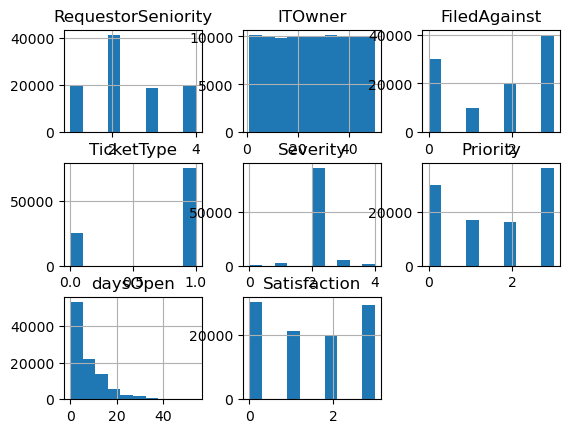

In [9]:
df.hist()

<Axes: ylabel='count'>

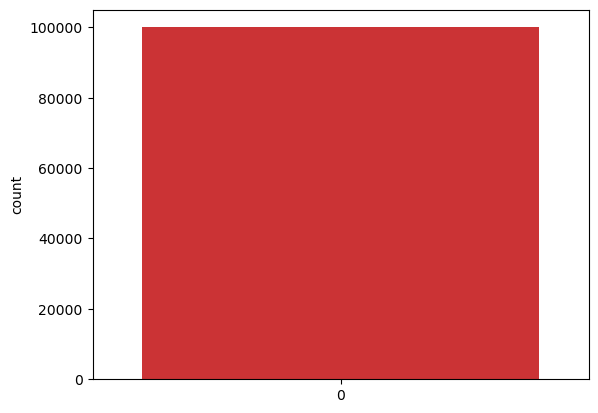

In [11]:
import seaborn as sns
sns.countplot(df['daysOpen'],palette='Set1')

In [12]:
sns.set(style='ticks')

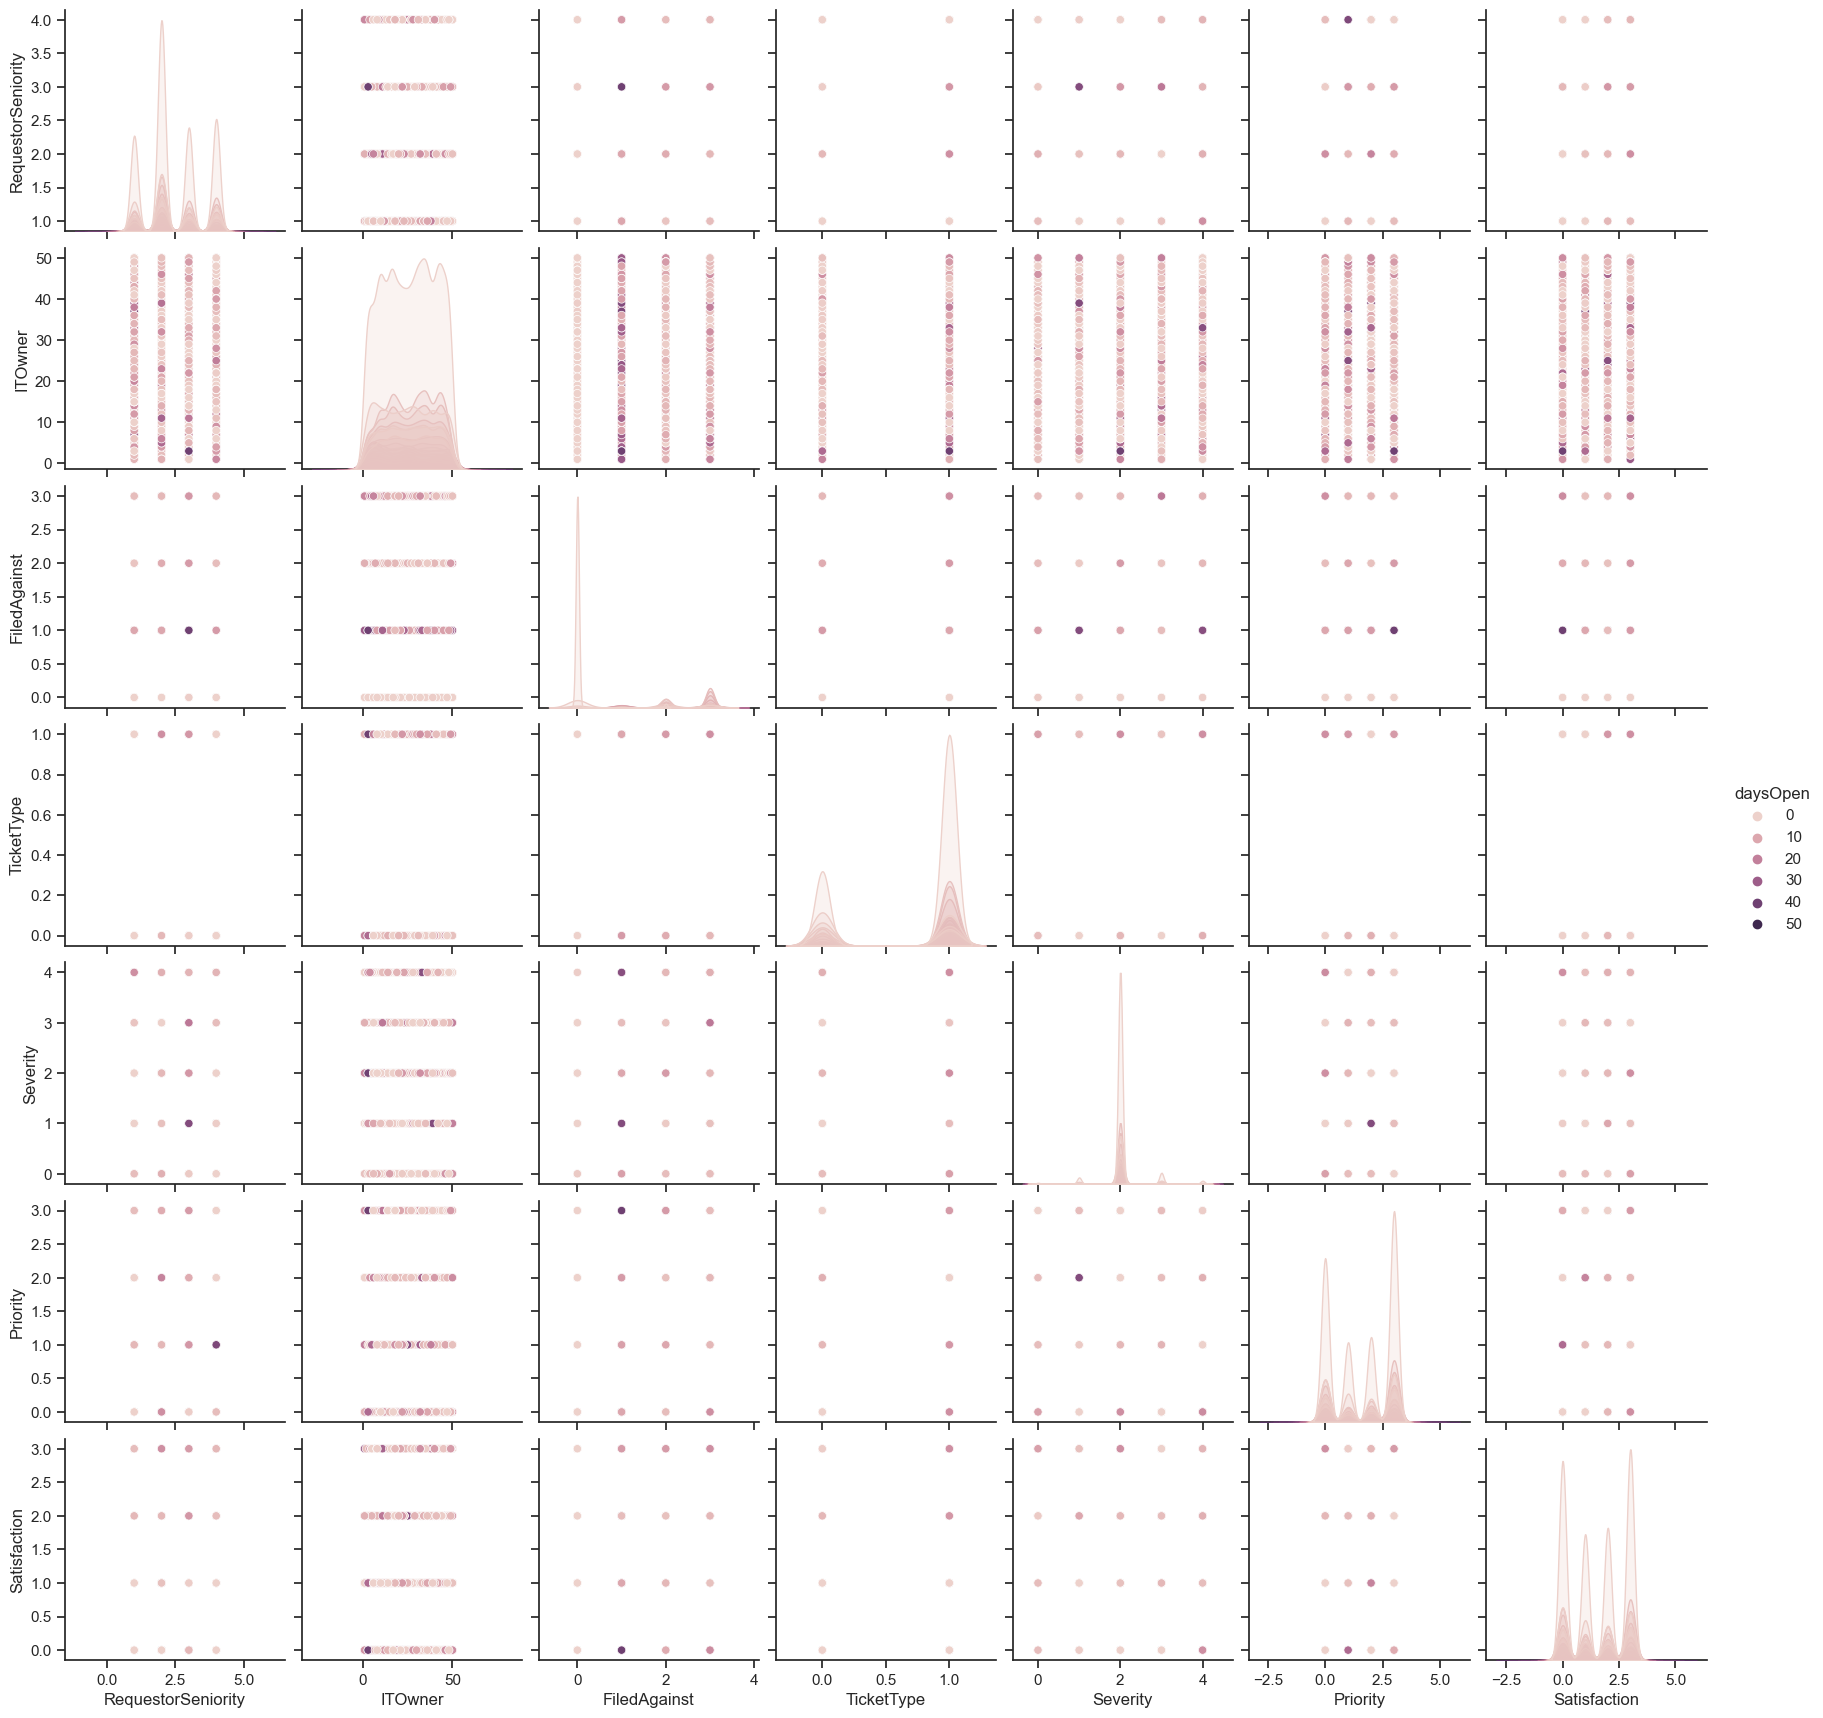

In [13]:
sns.pairplot(df, hue='daysOpen')

In [14]:
import matplotlib.pyplot as plt

<Axes: >

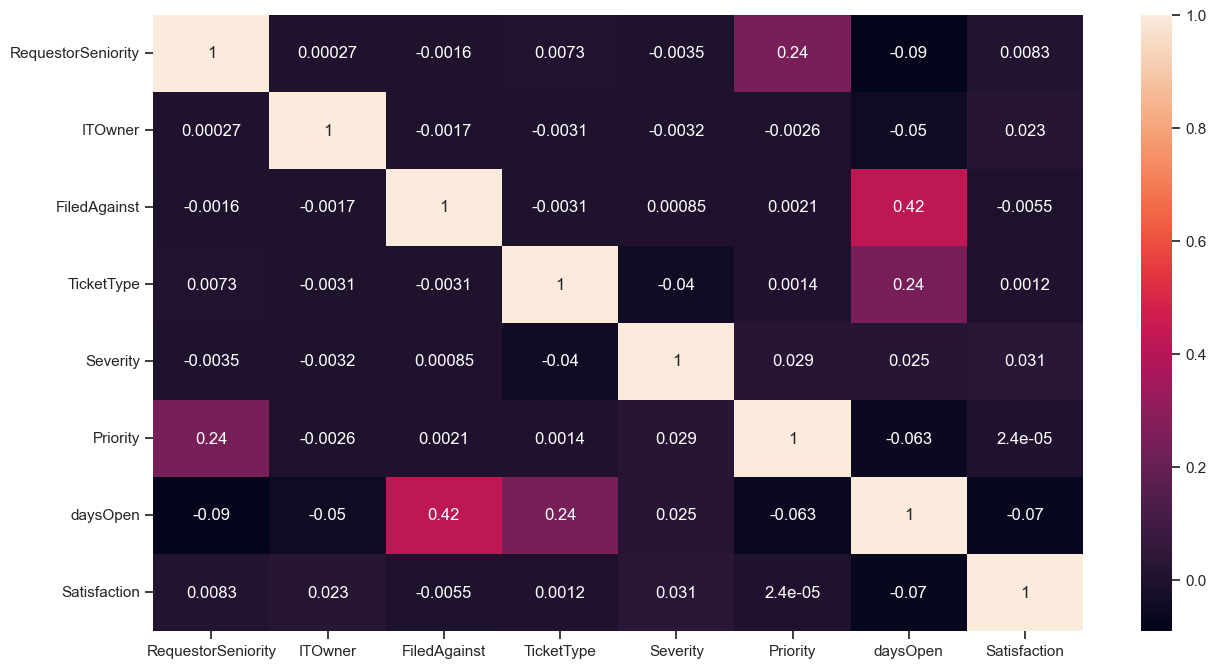

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

<Axes: >

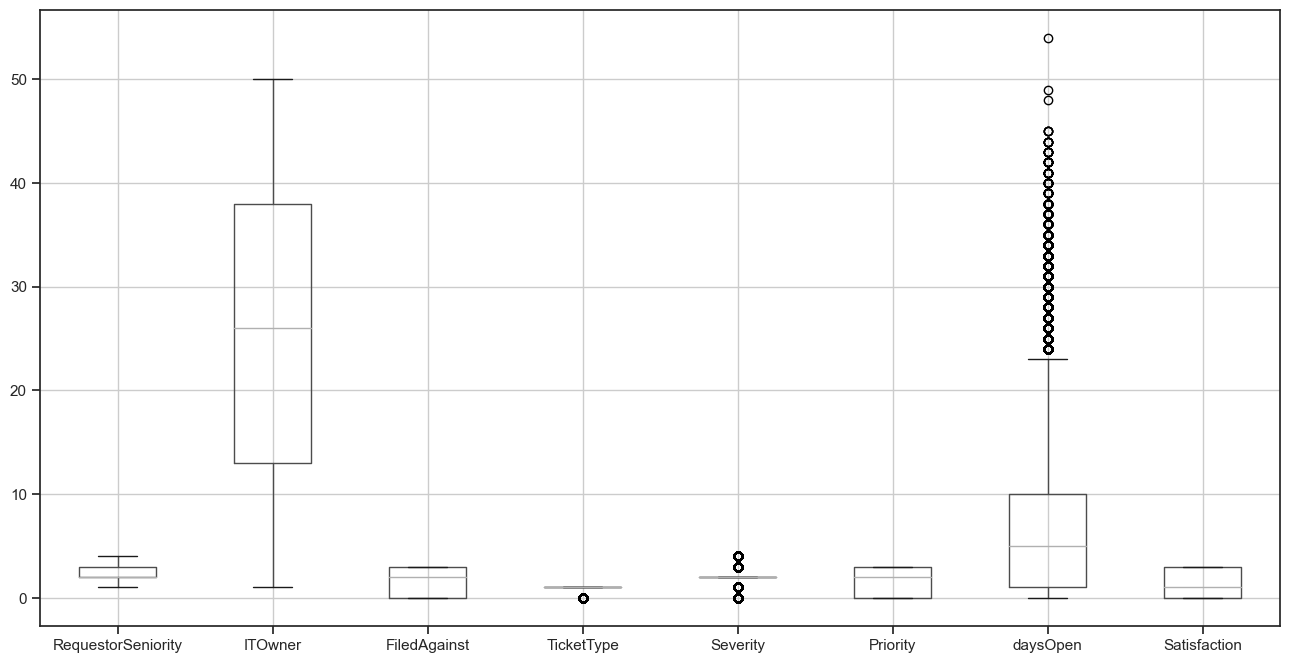

In [17]:
df.boxplot(figsize=(16,8))

In [18]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print("\n---IQR---\n",IQR)


---IQR---
 RequestorSeniority     1.0
ITOwner               25.0
FiledAgainst           3.0
TicketType             0.0
Severity               0.0
Priority               3.0
daysOpen               9.0
Satisfaction           3.0
dtype: float64


In [20]:
print("---Lower Range--- \n", (Q1-1.5*IQR))
print("---Upper Range--- \n", (Q3+1.5*IQR))

---Lower Range--- 
 RequestorSeniority     0.5
ITOwner              -24.5
FiledAgainst          -4.5
TicketType             1.0
Severity               2.0
Priority              -4.5
daysOpen             -12.5
Satisfaction          -4.5
dtype: float64
---Upper Range--- 
 RequestorSeniority     4.5
ITOwner               75.5
FiledAgainst           7.5
TicketType             1.0
Severity               2.0
Priority               7.5
daysOpen              23.5
Satisfaction           7.5
dtype: float64


In [21]:
new_df = pd.read_csv("Cybersure_IT_HelpDesk_Tickets_Ranged.csv")

In [22]:
new_df.head()

RequestorSeniority  ITOwner  FiledAgainst  TicketType  Severity  Priority  \
0                   1       50             3           0         2         0   
1                   2       15             2           1         1         1   
2                   2       15             0           1         2         0   
3                   4       22             3           1         2         0   
4                   1       22             0           1         2         1   

   daysOpen  response  Satisfaction  
0         3         0             1  
1         5         1             1  
2         0         0             0  
3        20         2             0  
4         1         0             1

In [83]:
feature_cols = ['RequestorSeniority', 'ITOwner', 'FiledAgainst', 'TicketType', 'Severity', 'Priority']
X = new_df[feature_cols]

feature_target = ['response']
y = new_df[feature_target]

In [84]:
print(X)

       RequestorSeniority  ITOwner  FiledAgainst  TicketType  Severity  \
0                       1       50             3           0         2   
1                       2       15             2           1         1   
2                       2       15             0           1         2   
3                       4       22             3           1         2   
4                       1       22             0           1         2   
...                   ...      ...           ...         ...       ...   
99995                   2       50             3           0         2   
99996                   4        8             0           1         2   
99997                   1       47             0           0         1   
99998                   2       32             3           1         2   
99999                   2       20             3           0         2   

       Priority  
0             0  
1             1  
2             0  
3             0  
4             1  
...

In [85]:
print(y)

       response
0             0
1             1
2             0
3             2
4             0
...         ...
99995         0
99996         0
99997         0
99998         2
99999         1

[100000 rows x 1 columns]


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24, test_size=0.2)

In [87]:
X_train.shape

(80000, 6)

In [88]:
X_test.shape

(20000, 6)

In [89]:
y_train.shape

(80000, 1)

In [90]:
y_test.shape

(20000, 1)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [92]:
y_pred = dt.predict(X_test)

In [93]:
print('Test Accuracy: ', accuracy_score(y_test,y_pred))

Test Accuracy:  0.8239


In [94]:
print('Train Accuracy: ', accuracy_score(y_train,dt.predict(X_train)))

Train Accuracy:  0.860725


In [95]:
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred_gini = dt_gini.predict(X_test)

In [97]:
print('Test Accuracy: ', accuracy_score(y_test,y_pred_gini))

Test Accuracy:  0.8236


<Axes: >

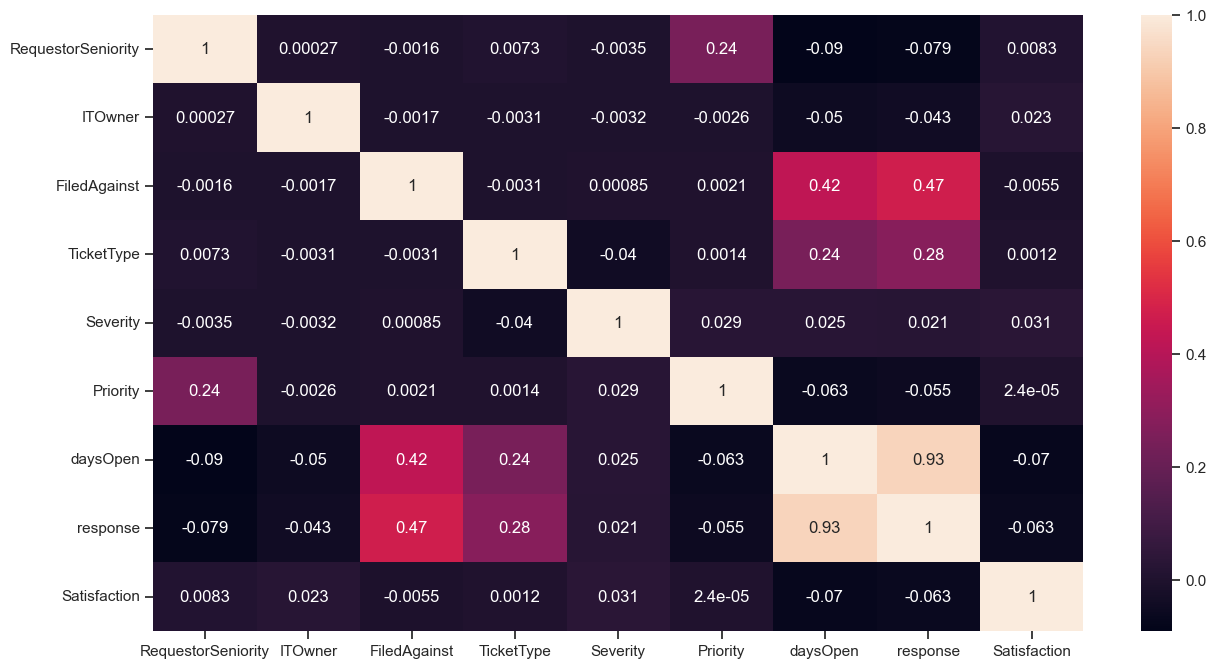

In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(), annot=True)

<Axes: >

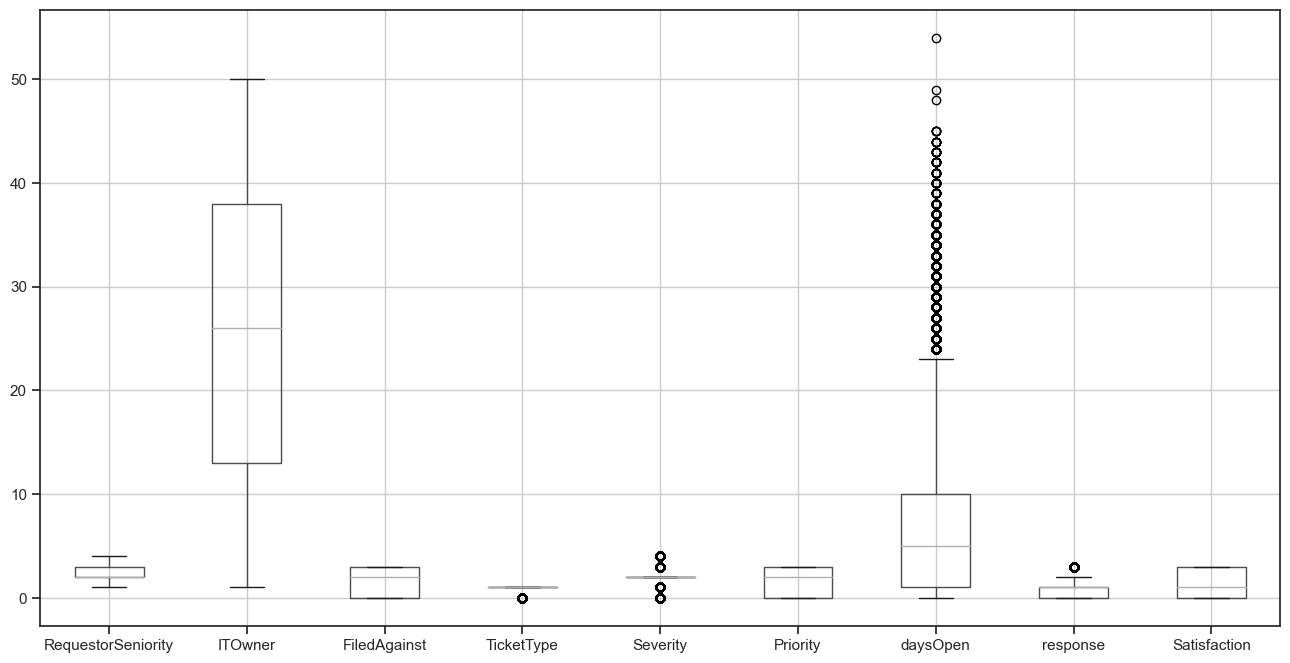

In [99]:
new_df.boxplot(figsize=(16,8))

In [100]:
input_values = [4, 10, 2, 1, 3, 1]
response_time = dt_gini.predict([input_values])

/Users/diddy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [101]:
if response_time == 1:
    print('Your issues should be resolved in 1 - 3 business days')

Your issues should be resolved in 1 - 3 business days
